# Assignment 1B by Group 28
John Lindblad and Olle Lindgren

In [42]:
# imports
import pandas as pd
import pprint
import matplotlib.pyplot as plt

# scikit learn tools
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# scikit learn classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

## Task 1: Working with a dataset with categorical features

### Step 1: Reading the data

In [21]:
adult_train = pd.read_csv('adult_train.csv')
adult_test = pd.read_csv('adult_test.csv')
#print(adult_train)
features = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
target = 'target'
Xtrain = adult_train[features]
#print(Xtrain)
Ytrain = adult_train[target]
#print(Ytrain)
Xtest = adult_test[features]
#print(Xtest)
Ytest = adult_test[target]
#print(Ytest)

### Step 2: Encoding the features as numbers

In [24]:
#convert into lists of dictionaries
Xtrain_dict = Xtrain.to_dict('records')
#print(Xtrain_dict[:5])
Xtest_dict = Xtest.to_dict('records')
#print(Xtest_dict[:5])
#Ytrain_dict = Ytrain.to_dict('records')
#Ytest_dict = Ytest.to_dict('records')

# make and apply a DictVectorizer to training data
dv = DictVectorizer()
Xtrain_encoded = dv.fit_transform(Xtrain_dict)
#print(Xtrain_encoded)
#print(type(Xtrain_encoded))
#Ytrain_encoded = dv.transform(Ytrain_dict)

# apply the same DictVectorizer to the test data
Xtest_encoded = dv.transform(Xtest_dict)
#print(Xtrain_encoded)
#print(type(Xtrain_encoded))
#Ytest_encoded = dv.transform(Ytest_dict)


### Step 3: Combining the steps 

In [25]:
# building a pipeline
pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier()
)

In [26]:
# testing the pipeline

#pipeline.score(Xtrain_dict, Ytrain)
# it works but I have no idea what the score tells me

pipeline.fit(Xtrain_dict, Ytrain);
# no errors given, I assume that it works

## Task 2: Decision trees and random forests

### Underfitting and overfitting in decision tree classifiers

In [38]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(Xtrain_encoded, Ytrain)
cvs_tree = cross_val_score(clf_tree, Xtrain_encoded, Ytrain, cv=5, error_score='raise').mean()
print(f'The cross-validation score on the test data is: {cvs_tree}')

The cross-validation score on the test data is: 0.8173275637347492


In [36]:
tree_acc = clf_tree.score(Xtest_encoded, Ytest)
print(f'The accuracy on the test data is: {tree_acc}')

The accuracy on the test data is: 0.8134021251765862


In [46]:
def tree_fitting_curve(max_depth, Xtrain, Ytrain, Xtest, Ytest):
    depths = []
    train_accuracy = []
    test_accuracy = []
    for i in range(1,max_depth+1):
        depths.append(i)
        clf = DecisionTreeClassifier(max_depth=i)
        train_accuracy.append(cross_val_score(clf, Xtrain, Ytrain, cv=5, error_score='raise').mean())
        test_accuracy.append(clf_tree.score(Xtest, Ytest))
        
    plt.plot(depths, train_accuracy, 'b', test_accuracy, 'r')
    #plt.legend((train_error, test_error), ('train error', 'test error'))
    
    return depths, train_accuracy, test_accuracy

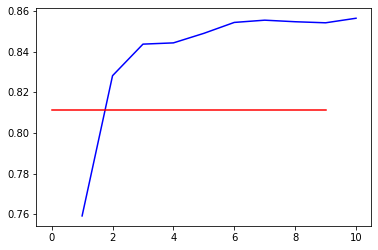

In [48]:
tree_fitting_curve(10, Xtrain_encoded, Ytrain, Xtest_encoded, Ytest);

### Underfitting and overfitting in random forest classifiers

In [34]:
clf_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf_forest.fit(Xtrain_encoded, Ytrain)
cvs_forest = cross_val_score(clf_forest, Xtrain_encoded, Ytrain, cv=5, error_score='raise').mean()
print(f'The cross-validation score on the test data is: {cvs_forest}')

The cross-validation score on the test data is: 0.8569455164515045


In [35]:
forest_acc = clf_forest.score(Xtest_encoded, Ytest)
print(f'The accuracy on the test data is: {forest_acc}')

The accuracy on the test data is: 0.8506848473680978


In [56]:
def forest_fitting_curve(n_trees, max_depth, Xtrain, Ytrain, Xtest, Ytest):
    depths = []
    train_accuracy = []
    test_accuracy = []
    for i in range(1,max_depth+1):
        depths.append(i)
        clf = RandomForestClassifier(max_depth=i, n_estimators=n_trees, n_jobs=-1)
        train_accuracy.append(cross_val_score(clf, Xtrain, Ytrain, cv=5, error_score='raise').mean())
        test_accuracy.append(clf_tree.score(Xtest, Ytest))
        
    plt.plot(depths, train_accuracy, 'b', test_accuracy, 'r')
    #plt.legend((train_error, test_error), ('train error', 'test error'))
    
    return depths, train_accuracy, test_accuracy

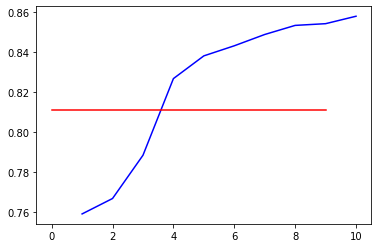

In [57]:
forest_fitting_curve(100, 10, Xtrain_encoded, Ytrain, Xtest_encoded, Ytest);

## Task 3: Feature importance in random forest classifiers

The code below prints a sorted list of the importance scores for all features starting with the most important one. In both cases scikit learn by default uses the gini score (mean decrease in impurity) to determine the importance of different features.

### Feature importance for the random forest classifier

In [29]:
# for the random forest classifier

importances = clf_forest.feature_importances_
names = dv.feature_names_
output = list(zip(names, importances))
#print(output)
output_sorted = sorted(output, key=lambda tup: tup[1], reverse=True)
pp = pprint.PrettyPrinter()
pp.pprint(output_sorted)

[('fnlwgt', 0.1646190781339431),
 ('age', 0.1503077480370359),
 ('capital-gain', 0.0941879228098677),
 ('hours-per-week', 0.0852984143415119),
 ('education-num', 0.0605269432578257),
 ('marital-status=Married-civ-spouse', 0.05752386982738975),
 ('relationship=Husband', 0.03982222511652837),
 ('capital-loss', 0.029877910336967163),
 ('marital-status=Never-married', 0.02874923649052793),
 ('occupation=Exec-managerial', 0.01894477640965589),
 ('occupation=Prof-specialty', 0.015354717342298423),
 ('education=Bachelors', 0.011524478325525863),
 ('sex=Male', 0.011170840301839928),
 ('workclass=Private', 0.010449333330712409),
 ('relationship=Not-in-family', 0.010444324529894968),
 ('relationship=Wife', 0.009839785008561294),
 ('education=Masters', 0.008543895183392488),
 ('workclass=Self-emp-not-inc', 0.008398835820082405),
 ('relationship=Own-child', 0.008152077715487302),
 ('sex=Female', 0.008095371546472914),
 ('education=HS-grad', 0.007586470751143972),
 ('occupation=Other-service', 0.00

Some features that are intuitive to find at the top and also ends up there are:

    age (salary tends to increase with experience)
    
    capital-gain (likely to be positively correlated with salary)
    
    hours per week (more hours usually means higher salary)
    
    education (education usually means to more qualified and better paid jobs)

### Feature importance for the decision tree classifier

In [15]:
importances = clf_tree.feature_importances_
names = dv.feature_names_
output = list(zip(names, importances))
#print(output)
output_sorted = sorted(output, key=lambda tup: tup[1], reverse=True)
pp = pprint.PrettyPrinter()
pp.pprint(output_sorted)

[('marital-status=Married-civ-spouse', 0.19777128189698664),
 ('fnlwgt', 0.18414435523869777),
 ('education-num', 0.11320605286769168),
 ('age', 0.10839973936526899),
 ('capital-gain', 0.1048135869860863),
 ('hours-per-week', 0.0698545046879415),
 ('capital-loss', 0.037985160985046416),
 ('occupation=Exec-managerial', 0.009341521145424844),
 ('workclass=Private', 0.009081583044568993),
 ('workclass=Self-emp-not-inc', 0.008663331891141494),
 ('occupation=Sales', 0.008343797869959271),
 ('occupation=Prof-specialty', 0.007525121709789264),
 ('occupation=Craft-repair', 0.007398447705215974),
 ('workclass=Local-gov', 0.005981843065125365),
 ('native-country=United-States', 0.005644946522155411),
 ('race=White', 0.005411552620154304),
 ('occupation=Machine-op-inspct', 0.0052601087415490464),
 ('occupation=Transport-moving', 0.005235721904302993),
 ('workclass=Self-emp-inc', 0.0051506280733530216),
 ('workclass=State-gov', 0.004744091961193072),
 ('occupation=Tech-support', 0.0047394301709972

The above mentioned (age, education, capital gain and hours per week) ends up in the top also on this one and our intuitive explanation for this is the same as above. 

### Alternative approach
One alternative to this approach is to instead compute the importance of features is to find the most important feature by using a method called drop-column. The idea is to retrain the model several times and drop one column each time. The importance is then defined as the difference between the performance of all columns and the performance with the specific column dropped. This method is often seen as one of the most accurate when determining the importance sicne it measures the model accuracy with and without different features. However, it has a huge drawback, especiall for bigger models. The fact that the model needs to be retrained once for every column dropped means that it is very computationally expensive and sometimes impossible to apply in practice. [source: https://explained.ai/rf-importance/]